In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

In [3]:
data = pd.read_csv("../datasets/PCA.csv")
samples = data['Sample'].values
spectra = data.drop(columns=['Device', 'Folder', 'Temp', 'Sample']).values

spectra = (spectra - spectra.mean(axis=0)) / spectra.std(axis=0)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(samples)

In [ ]:
num_classes = len(np.unique(encoded_labels))

inputs = Input(shape=(spectra.shape[1],))
x = Dense(512, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(spectra, encoded_labels, test_size=2/11)
history = model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=32)
        #   callbacks=[EarlyStopping(patience=5)])

Epoch 1/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0973 - loss: 5.3200 - val_accuracy: 0.3753 - val_loss: 2.2568
Epoch 2/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5142 - loss: 1.6637 - val_accuracy: 0.5362 - val_loss: 1.4939
Epoch 3/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6949 - loss: 0.9710 - val_accuracy: 0.6297 - val_loss: 1.1941
Epoch 4/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7785 - loss: 0.6875 - val_accuracy: 0.6682 - val_loss: 1.0485
Epoch 5/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8289 - loss: 0.5269 - val_accuracy: 0.6971 - val_loss: 1.0057
Epoch 6/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.4250 - val_accuracy: 0.7232 - val_loss: 0.8958
Epoch 7/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8875 - loss: 0.3580 - val_accuracy: 0.7296 - val_loss: 0.8448
Epoch 8/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9046 - loss: 0.2842 - val_accu

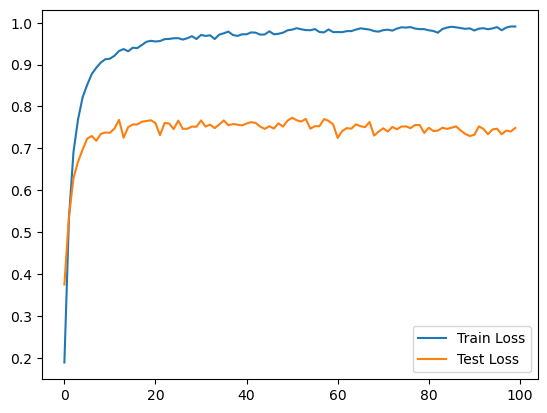

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Test Loss')
plt.legend()
plt.show()

In [23]:
def find_similar_classifier(model, query_spectrum, top_n=3):
    query = (query_spectrum - spectra.mean(axis=0)) / spectra.std(axis=0)
    probs = model.predict(np.array([query]))[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    return label_encoder.inverse_transform(top_indices), probs[top_indices]

In [55]:
spec_id = 3
top_n = 3

#------------------------------------------------------------------

my_spectrum = spectra[spec_id]

finded_classes = find_similar_classifier(model, my_spectrum, top_n)

print(f"Sample <{data["Sample"].iloc[spec_id]}>({spec_id}) test for {top_n} classes:")
for i in range(top_n):
    print(f"    <{finded_classes[0][i]}> by {finded_classes[1][i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Sample <zn5>(3) test for 3 classes:
    <zn5> by 1.0
    <NiCu> by 1.7582982028439072e-15
    <147> by 2.016561724137362e-21
